# **US Health Outcomes (Progress Report)**

**Group Leader:**\
*Ryyan Hussain* (rhuss4@uic.edu, [rhuss04](https://github.com/rhuss04))

**Group Members:**\
*Arjun Ancha* (aanch@uic.edu, [ArjunAncha](https://github.com/ArjunAncha))\
*Amit Bhatt*  (abhat32@uic.edu, [amitbhatt-star](https://github.com/amitbhatt-star))\
*Mateo Castillo* (mcast29@uic.edu, [CatMats](https://github.com/CatMats))\
*Joshua John* (jjohn314@uic.edu, [jjohn314](https://github.com/jjohn314))

## Introduction
This project investigates county-level health outcomes in the United States using the CDC’s PLACES dataset, which provides small and detailed estimates for public health indicators. 

The dataset contains over 2 million records, each representing a county, a specific health condition, and its associated prevalence rate, both crude and age-adjusted. This  project will focus on analyzing 4 major health outcomes: obesity, depression, binge drinking, and overall disability.

The central goal is to identify geographic patterns, correlations, and potential socioeconomic factors that influence the previously mentioned patterns. Understanding these complex relationships will expose regional inequalities and can inform future public policy decisions. 

## Changes

After conducting our initial data preparation and exploratory data analysis (EDA), we have reviewed our original project scope and found that no changes are necessary at this time.

## Data

The dataset used in the project is the 2023 CDC PLACES release in CSV format. Data preparation, coded in Python, includes the following steps:

1. Loading the CSV file into Python using pandas.
2. Cleaning column names by stripping leading and trailing spaces.
3. Cleaning the Measure column by stripping spaces and converting text to lowercase for consistent filtering.
4. Filtering for targeted health measures: Obesity, Binge Drinking, Disability, and Depression.
5. Filtering by prevalence type, keeping only age-adjusted values and discarding crude values to ensure comparability across counties.
6. Pivoting the DataFrame so that each row represents a county and each column represents a measure’s prevalence value, resulting in a clean format ready for exploratory data analysis and visualization.


The filtered data contains 27430 rows, with each row representing a U.S location.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#The initial dataframe itself, unfiltered.
filePath = "PLACES__Local_Data_for_Better_Health__Place_Data_2023_release.csv"
df = pd.read_csv(filePath)

print("Dataset shape:", df.shape)
print(df.head())

# Clean Measure column (strip + lowercase)
df["Measure"] = df["Measure"].str.strip().str.lower()

# All distinct measures
all_measures = sorted(df["Measure"].unique())

# Pretty print
for i, m in enumerate(all_measures, 1):
    print(f"{i:02d}. {m}")

Dataset shape: (2054768, 21)
   Year StateAbbr  StateDesc LocationName DataSource         Category  \
0  2021        MO   Missouri    West Line      BRFSS  Health Outcomes   
1  2021        MO   Missouri  West Plains      BRFSS  Health Outcomes   
2  2021        MO   Missouri     Westwood      BRFSS  Health Outcomes   
3  2021        WI  Wisconsin     Florence      BRFSS       Prevention   
4  2021        MO   Missouri    Whiteside      BRFSS       Disability   

                                             Measure Data_Value_Unit  \
0  Chronic obstructive pulmonary disease among ad...               %   
1             Arthritis among adults aged >=18 years               %   
2             Arthritis among adults aged >=18 years               %   
3  Taking medicine for high blood pressure contro...               %   
4  Cognitive disability among adults ages >=18 years               %   

           Data_Value_Type  Data_Value  ... Data_Value_Footnote  \
0         Crude prevalence      

In [3]:
df.columns = df.columns.str.strip()

df["Measure"] = df["Measure"].str.strip().str.lower()

#assign targetMeasures to help with getting specific health outcomes
targetMeasures = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years",
    "any disability among adults aged >=18 years",
    "no leisure-time physical activity among adults aged >=18 years",
    "current smoking among adults aged >=18 years",
    "sleeping less than 7 hours among adults aged >=18 years",
    "high blood pressure among adults aged >=18 years",
    "high cholesterol among adults aged >=18 years who have been screened in the past 5 years",
    "coronary heart disease among adults aged >=18 years",
    "stroke among adults aged >=18 years",
    "fair or poor self-rated health status among adults aged >=18 years",
    "mental health not good for >=14 days among adults aged >=18 years",
    "current lack of health insurance among adults aged 18-64 years",
    "visits to doctor for routine checkup within the past year among adults aged >=18 years",
    "visits to dentist or dental clinic among adults aged >=18 years",
    "independent living disability among adults aged >=18 years",
    "mobility disability among adults aged >=18 years",
    "diagnosed diabetes among adults aged >=18 years",
]

#the new dataframe, filtering only to have target measures to prevent fluff data.
dfFiltered = df[df["Measure"].isin(targetMeasures)]
dfFiltered = dfFiltered[dfFiltered["Data_Value_Type"] == "Age-adjusted prevalence"]

#new dataframe is pivoted into a wide format
dfWide = dfFiltered.pivot_table(
    index=["StateAbbr", "StateDesc", "LocationName", "TotalPopulation"],
    columns="Measure",
    values="Data_Value"
).reset_index()

dfWide.columns.name = None

#filtered data is saved into a csv file
dfWide.to_csv('filtered_PLACESData_2023.csv', index=False)

#previewing the new data by it's head (first 5 rows)
print(dfWide.shape)
print(dfWide.head())
print(dfWide["StateAbbr"].unique())


(27430, 23)
  StateAbbr StateDesc LocationName  TotalPopulation  \
0        AK    Alaska     Akiachak              627   
1        AK    Alaska        Akiak              346   
2        AK    Alaska       Akutan             1027   
3        AK    Alaska     Alakanuk              677   
4        AK    Alaska    Aleknagik              219   

   any disability among adults aged >=18 years  \
0                                         50.5   
1                                         50.4   
2                                         28.5   
3                                         54.0   
4                                         41.4   

   binge drinking among adults aged >=18 years  \
0                                         15.8   
1                                         15.6   
2                                         15.1   
3                                         15.3   
4                                         18.6   

   coronary heart disease among adults aged >=18 years 

## EDA 


Descriptive statistics show that obesity and any form of disability are more prevalent than binge drinking and depression, with average prevalence values of 36.1% and 29.8% compared to 17.9% and 23.5%, respectively. 
The standard deviations for obesity (5.6) and disability (6.8) are higher than those for depression (3.5) and binge drinking (2.8), indicating a wider spread of values. 

State-level bar charts reveal clear regional patterns. 
Southern states generally exhibit higher prevalence of obesity, depression, and disability, while binge drinking deviates from this pattern, being concentrated in the Midwest, with Wisconsin showing the highest rates. These patterns suggest geographic clustering of negative health outcomes.

Correlation analysis supports these observations. Obesity and disability are strongly positively correlated, indicating that these conditions often co-occur. 
Depression shows moderate positive correlation with obesity and disability, while binge drinking is negatively correlated with the other three measures, with the strongest negative correlation observed with disability. These findings highlight interesting relationships in the data and provide a foundation for further analysis.

Hypothesis 1: Binge drinking is negatively correlated with disability, obesity, and depression implying that causes of said medical condition may be influenced by different socioeconomic and health patterns that the other measures. 

Hypothesis 2: There is a significant inverse relationship between the prevalence of binge drinking and the prevalence of chronic negative health outcomes, specifically disability and obesity.

In [4]:
#Reading processed filtered data
filePath = "filtered_PLACESData_2023.csv"
dfWide = pd.read_csv(filePath)

targetMeasures = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]
summary_stats = dfWide[targetMeasures].describe()
print(summary_stats)

       obesity among adults aged >=18 years  \
count                          26530.000000   
mean                              36.089284   
std                                5.596153   
min                               13.900000   
25%                               32.800000   
50%                               36.500000   
75%                               39.600000   
max                               60.400000   

       depression among adults aged >=18 years  \
count                             26530.000000   
mean                                 23.150903   
std                                   3.484732   
min                                  10.200000   
25%                                  20.900000   
50%                                  23.300000   
75%                                  25.400000   
max                                  35.400000   

       binge drinking among adults aged >=18 years  \
count                                 26530.000000   
mean             

### State Prevalences (Joshua John)
Averaging all county data into the state level

It's an interactive database "search engine" that based on user input for health outcome, displays which states have the highest prevalence for said outcome. 

It outputs the top 10 and bottom 10 states that have that outcome.

Select a health measure to sort states by (ascending):
1: Obesity Among Adults Aged >=18 Years
2: Depression Among Adults Aged >=18 Years
3: Binge Drinking Among Adults Aged >=18 Years
4: Any Disability Among Adults Aged >=18 Years



Enter 1, 2, 3, or 4:  1


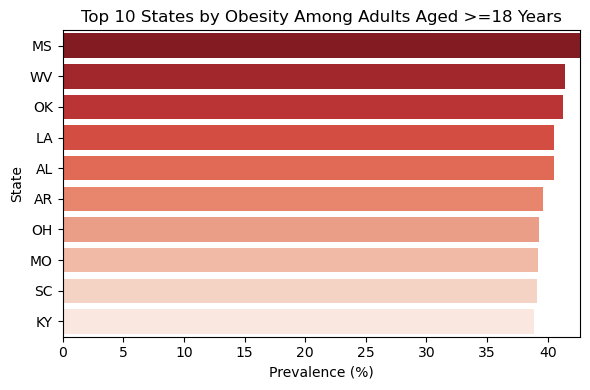

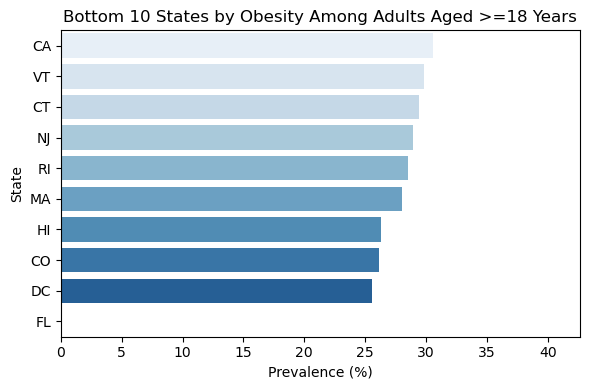

States sorted by ascending Obesity Among Adults Aged >=18 Years:
   StateAbbr  obesity among adults aged >=18 years
0         MS                             42.653911
1         WV                             41.431043
2         OK                             41.251897
3         LA                             40.519486
4         AL                             40.514462
5         AR                             39.586847
6         OH                             39.307615
7         MO                             39.223593
8         SC                             39.102828
9         KY                             38.850760
10        ND                             38.765909
11        NE                             38.700825
12        KS                             38.631973
13        TX                             38.106106
14        GA                             37.804715
15        AK                             37.769869
16        IN                             37.553414
17        NC     

In [5]:
#printing options of availible health measures
print("Select a health measure to sort states by (ascending):")
measureColumnsDictionary = {
    1: "obesity among adults aged >=18 years",
    2: "depression among adults aged >=18 years",
    3: "binge drinking among adults aged >=18 years",
    4: "any disability among adults aged >=18 years"
}
for key, val in measureColumnsDictionary.items():
    print(f"{key}: {val.title()}")

#ask for user's health outcome to analyze (number inputs 1-4)
while True:
    choice = int(input("\nEnter 1, 2, 3, or 4: ").strip())
    if 1 <= choice <= 4:
        break
    else:
        print("**Invalid choice.. try again.")

#health measure selected and states are ordered before visual
selectedMeasure = measureColumnsDictionary[choice]
dfStateAverage = dfWide.groupby("StateAbbr")[selectedMeasure].mean().reset_index()
dfStateAverage = dfStateAverage.sort_values(selectedMeasure, ascending=False).reset_index(drop=True)

#showing figure for top 10 states
topStates = dfStateAverage.head(10)
plt.figure(figsize=(6,4))
ax = sns.barplot(data=topStates, x=selectedMeasure, y="StateAbbr", hue="StateAbbr", palette="Reds_r", legend=False)
ax.set(title=f'Top 10 States by {selectedMeasure.title()}', xlabel='Prevalence (%)', ylabel='State')
plt.xlim(0, dfStateAverage[selectedMeasure].max())
plt.tight_layout()
plt.show()

#showing figure for bottom 10 states
bottomStates = dfStateAverage.tail(10)
plt.figure(figsize=(6,4))
ax = sns.barplot(data=bottomStates, x=selectedMeasure, y="StateAbbr", hue="StateAbbr", palette="Blues", legend=False)
ax.set(title=f'Bottom 10 States by {selectedMeasure.title()}', xlabel='Prevalence (%)', ylabel='State')
plt.xlim(0, dfStateAverage[selectedMeasure].max())
plt.tight_layout()
plt.show()

#raw text for all states
print(f"States sorted by ascending {selectedMeasure.title()}:")
print(dfStateAverage)

### Location Prevalence by State (Arjun Ancha)

A more "zoom-in" analysis of prevalence per state.

It's an interactive database "search engine" that based on user input for health outcome and state abbreviation, that displays which locations have the highest prevalence for said outcome in user's selected state. 

It outputs the top 50 and bottom 50 location which have that outcome.

Select a health measure:
1: Obesity Among Adults Aged >=18 Years
2: Depression Among Adults Aged >=18 Years
3: Binge Drinking Among Adults Aged >=18 Years
4: Any Disability Among Adults Aged >=18 Years



Enter 1, 2, 3, or 4:  1
Enter the 2-letter state abbreviation AK


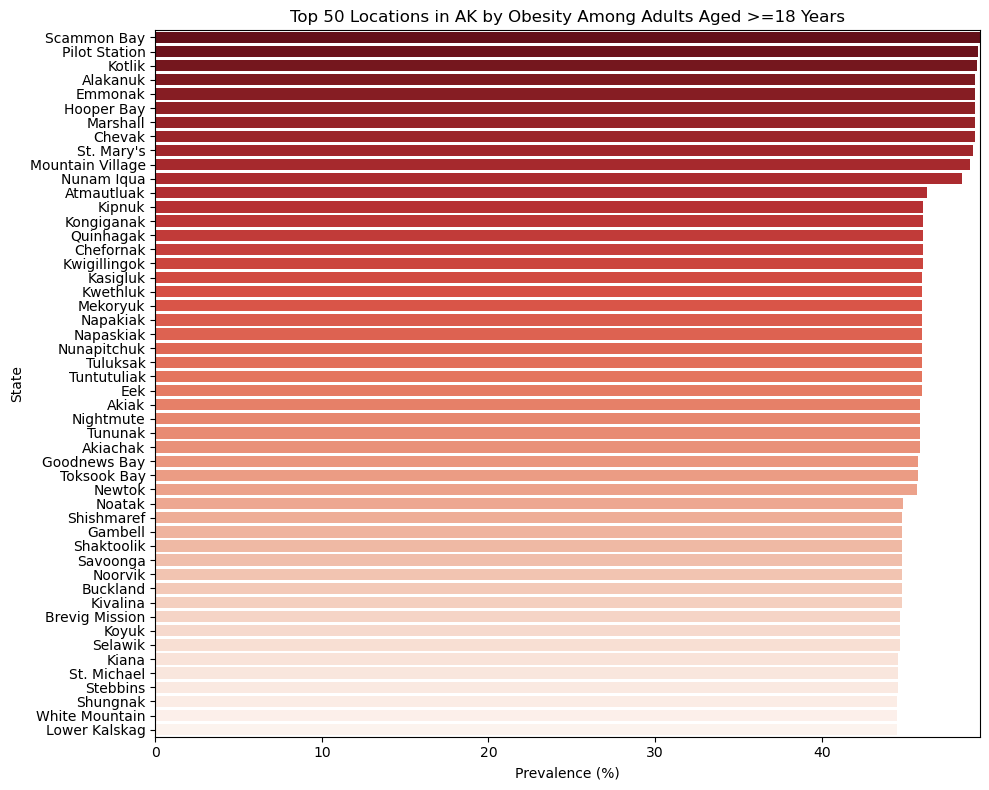

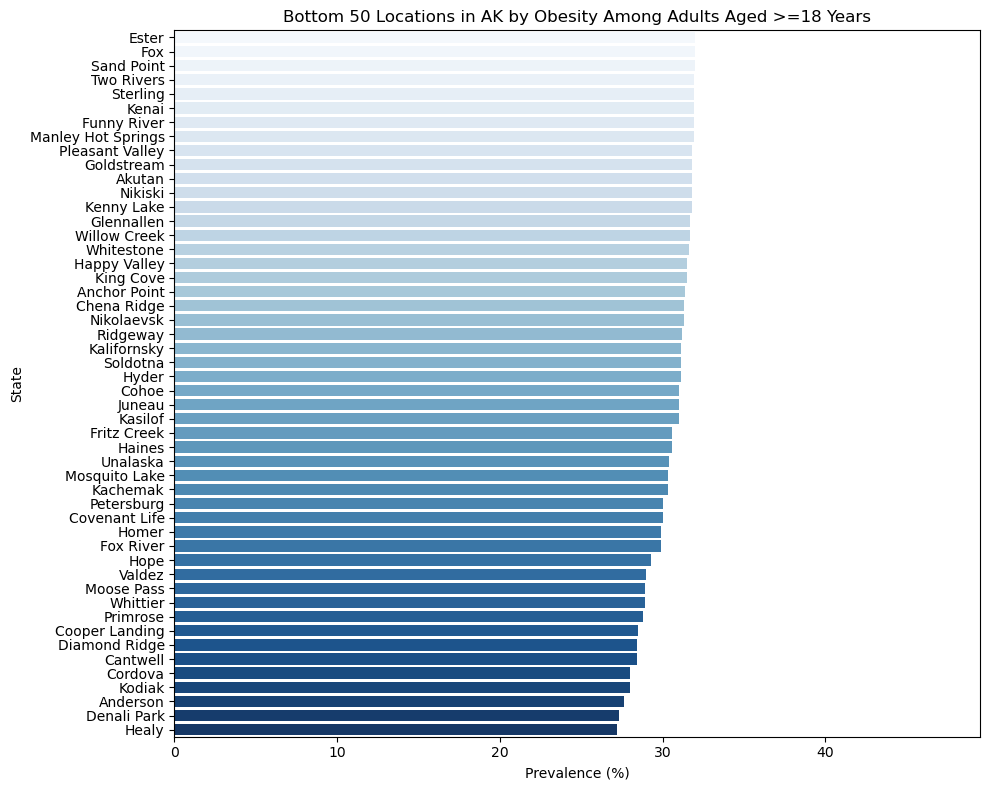

In [6]:
#printing options of availible health measures
print("Select a health measure:")
for key, val in measureColumnsDictionary.items():
    print(f"{key}: {val.title()}")

#ask for user's health outcome to analyze (number inputs 1-4)
while True:
    choice2 = int(input("\nEnter 1, 2, 3, or 4: ").strip())
    if 1 <= choice2 <= 4:
        break
    else:
        print("**Invalid choice.. try again.")

#health measure selected
selectedMeasure2 = measureColumnsDictionary[choice2]

#ask for user's state to query (i.e. AK, AL)
validStates = dfWide["StateAbbr"].unique()
while True:
    state = input("Enter the 2-letter state abbreviation").strip().upper()
    if state in validStates:
        break
    else:
        print("**Invalid choice.. try again.")

#state is selected and locations are ordered before visual.
dfStateLocations = dfWide[dfWide["StateAbbr"] == state]
dfStateLocations = dfStateLocations.sort_values(selectedMeasure2, ascending=False)

#showing figure for top 50 locations
topLocations = dfStateLocations.head(50)
plt.figure(figsize=(10,8))
ax = sns.barplot(data=topLocations, x=selectedMeasure2, y="LocationName", hue="LocationName", palette="Reds_r", legend=False)
ax.set(title=f'Top 50 Locations in {state} by {selectedMeasure2.title()}', xlabel='Prevalence (%)', ylabel='State')
plt.xlim(0, dfStateLocations[selectedMeasure2].max())
plt.tight_layout()
plt.show()

#showing figure for bottom 50 locations
bottomLocations = dfStateLocations.tail(50)
plt.figure(figsize=(10,8))
ax = sns.barplot(data=bottomLocations, x=selectedMeasure2, y="LocationName", hue="LocationName", palette="Blues", legend=False)
ax.set(title=f'Bottom 50 Locations in {state} by {selectedMeasure2.title()}', xlabel='Prevalence (%)', ylabel='State')
plt.xlim(0, dfStateLocations[selectedMeasure2].max())
plt.tight_layout()
plt.show()

### Correlation Matrix (Arjun Ancha)

This heatmap is used to quickly measure the strength and direction of the relationship between pairs of each health measure.

In the Disability column, we see that there is a positive correlation with both obesity and depression.

We also see that the Binge Drinking column has a negative correlation with every other measure. Its relationship with Disability is strongly negative, showing an inverse relationship.

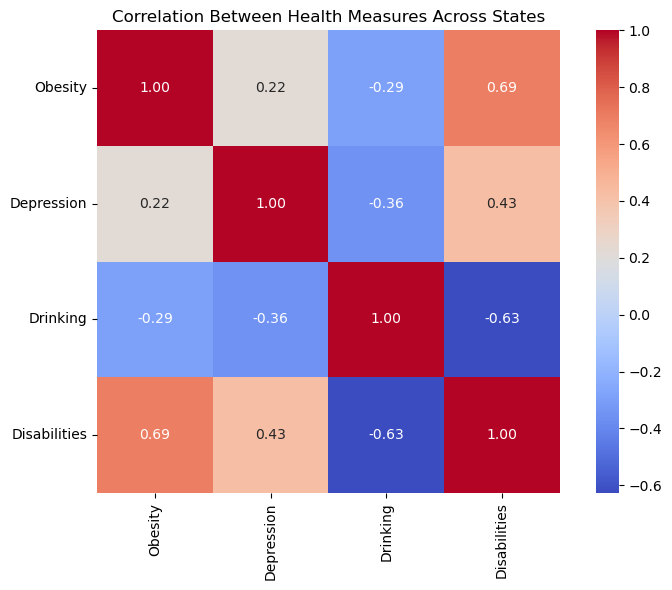

In [7]:
measureColumns = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]


dfState = dfWide.groupby("StateAbbr")[measureColumns].mean()


stateCorrelation = dfState.corr()


plt.figure(figsize=(8, 6))
ax = sns.heatmap(stateCorrelation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
ax.set(title="Correlation Between Health Measures Across States")

#Renaming existing ticks
newLabels = ["Obesity", "Depression", "Drinking", "Disabilities"]
ax.set_xticks(np.arange(len(newLabels)) + 0.5)
ax.set_xticklabels(newLabels)
ax.set_yticks(np.arange(len(newLabels)) + 0.5)
ax.set_yticklabels(newLabels)

#tightening and showing the figure
plt.tight_layout()
plt.show()


### Violin Plot (Mateo Castillo)

This Violin plot is used to make a side-by-side comparison of the full shape and spread for the 4 health measures at a glance.

What it is showing is how widely distributed these health measures are accounted for accross all the US's counties.

We can see that 'Disability' and 'Obesity' by itself are taller, meaning there is a more broad range of outcomes across the country(i.e. the counties with the highest and lowest rates are very far apart).

Meanwhile, 'Depression' and 'Binge Drinking' are shorter, which means that the prevalence rates are more consistent and fall within a more specific range across the nation (i.e. most counties are very similar to each other on these measures).

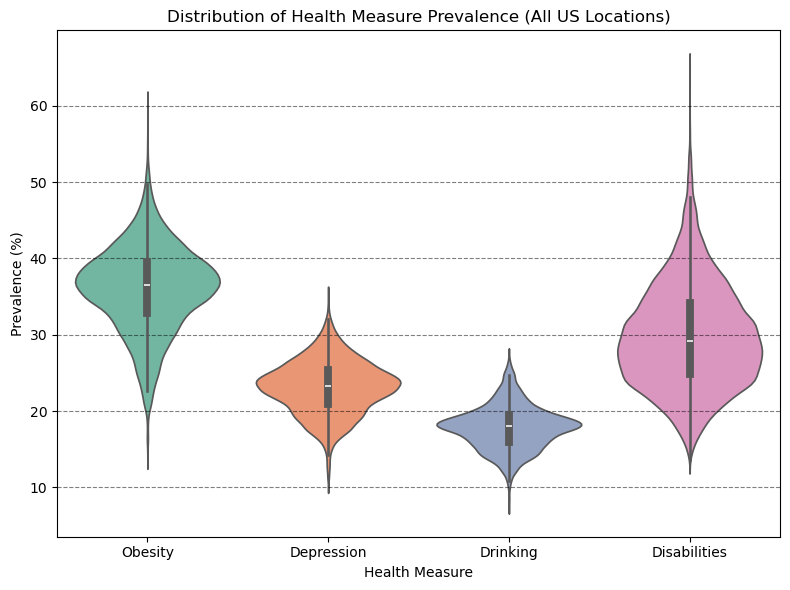

In [8]:
dfLong = dfWide.melt(id_vars=["StateAbbr", "LocationName"],
                     value_vars=measureColumns,
                     var_name="Measure",
                     value_name="Prevalence")

#creating the plot
plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=dfLong, x="Measure", y="Prevalence", hue="Measure", palette="Set2", legend=False)
ax.set(title='Distribution of Health Measure Prevalence (All US Locations)', xlabel='Health Measure', ylabel='Prevalence (%)')

#renaming existing ticks
newLabels = ["Obesity", "Depression", "Drinking", "Disabilities"]
ax.set_xticks(range(len(newLabels)))
ax.set_xticklabels(newLabels)

#adding horizontal lines for easier visual comparison
ax.grid(True, axis='y', linestyle='--', color='black', alpha=0.5)

#tightening and showing the figure
plt.tight_layout()
plt.show()

### Hexbin Plot (Amit Bhatt)

A normal scatter plot with 2 million rows will just look like a big blob.
A hexbin plot shows where the points are dense using color.
What it shows:

- How disability changes as obesity increases.


- Where most counties are (high density areas).


- You can see if higher obesity is linked with higher disability.

This is a hexbin plot of obesity vs. disability.
Each hexagon shows how many counties fall in that range. We observe that counties with higher obesity tend to have higher disability, and most counties are grouped in the mid-range of both measures. This gives a clearer picture than a simple scatter plot, especially with a large dataset.

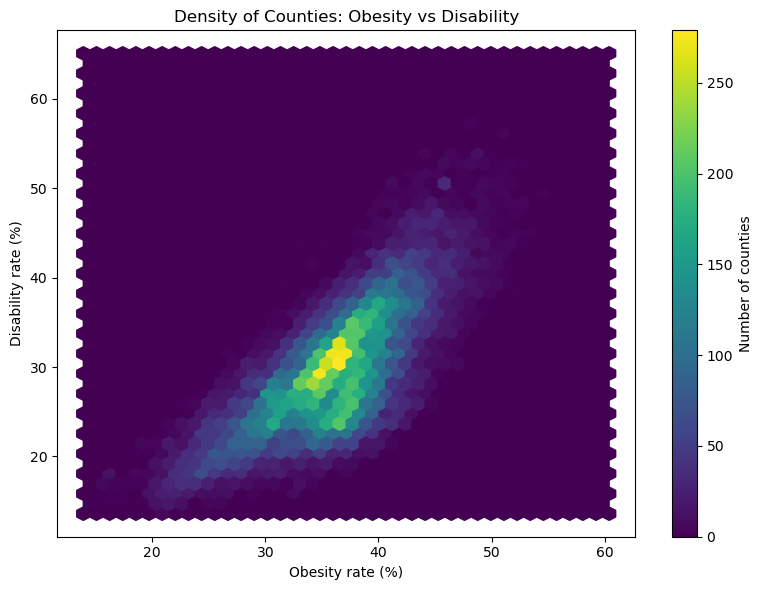

In [9]:
plt.figure(figsize=(8, 6))

x = dfWide["obesity among adults aged >=18 years"]
y = dfWide["any disability among adults aged >=18 years"]

hb = plt.hexbin(x, y, gridsize=40, cmap="viridis")
plt.colorbar(hb, label="Number of counties")

plt.xlabel("Obesity rate (%)")
plt.ylabel("Disability rate (%)")
plt.title("Density of Counties: Obesity vs Disability")

plt.tight_layout()
plt.show()


### Binned Barplot (Amit Bhatt)

Instead of just plotting raw depression vs disability, we can group counties into levels (Low, Medium, High, Very High depression), then show the average disability rate in each group.
This is like saying:
- “When depression is low, what is the typical disability rate?”


- “When depression is high, what is the typical disability rate?”

*What it shows*

- How disability changes as depression gets worse.


- Easier to read than a big cloud of points.


- Looks very nice in a presentation or report.






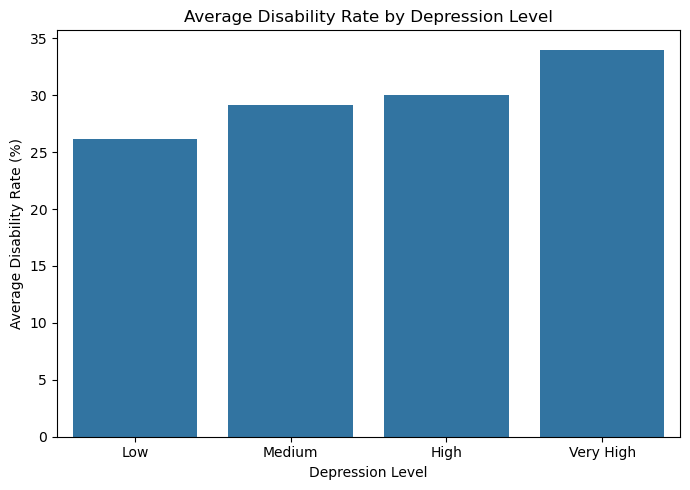

  Depression Level  any disability among adults aged >=18 years
0              Low                                    26.158704
1           Medium                                    29.163307
2             High                                    30.047825
3        Very High                                    33.994386


In [10]:
# Step 1: make depression levels (4 groups)
depression_col = "depression among adults aged >=18 years"
disability_col = "any disability among adults aged >=18 years"

dfWide["Depression Level"] = pd.qcut(
    dfWide[depression_col],
    q=4,
    labels=["Low", "Medium", "High", "Very High"]
)

# Step 2: compute average disability for each level
grouped = dfWide.groupby("Depression Level", observed=False)[disability_col].mean().reset_index()
grouped = grouped.sort_values("Depression Level")  # keep correct order

# Step 3: bar plot
plt.figure(figsize=(7, 5))
sns.barplot(data=grouped, x="Depression Level", y=disability_col)

plt.title("Average Disability Rate by Depression Level")
plt.xlabel("Depression Level")
plt.ylabel("Average Disability Rate (%)")

plt.tight_layout()
plt.show()

print(grouped)

## Machine learning

### Unsupervised Clustering (Arjun Ancha)

This ML practice is a 'search engine' used to help unveil natural hidden groupings among the health outcomes.
Since the model was unsupervised, it wasn't given any target but instead 4 health measures for all 27,000+ locations. 
and split into k=3 distinct clusters, which based on which locations are closer to each other. 
user can decide between clustering of a specific state or nationwide.

It would help test the idea if it would discover high-low risk on a high-low health measure.

based on the nationwide analysis,
We can see that in cluster 0, there is a 'high-risk, low drinking' relationship
and in cluster 1, there is a 'low-risk, high drinking' relationship
cluster 2 is just a middle ground or national average

Would you like to analyze 'national' or 'state' data?  national


Cluster Summary for National
         binge drinking among adults aged >=18 years  \
Cluster                                                
0                                              20.04   
1                                              14.83   
2                                              18.05   

         obesity among adults aged >=18 years  \
Cluster                                         
0                                       31.45   
1                                       41.97   
2                                       36.17   

         depression among adults aged >=18 years  \
Cluster                                            
0                                          20.15   
1                                          24.88   
2                                          24.35   

         any disability among adults aged >=18 years  
Cluster                                               
0                                              23.09  
1                 

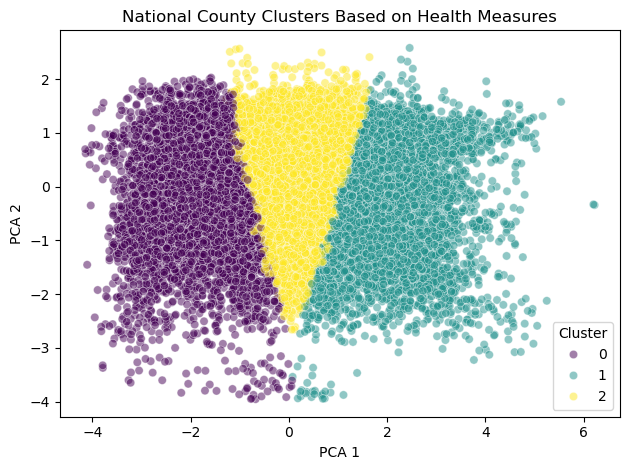

Mean Squared Error: 26.444355514293843
R² Score: 0.40527817033597535


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


choice = input("Would you like to analyze 'national' or 'state' data? ").strip().lower()


if choice == "state":
    stateAbbreviation = input("Enter the two-letter state abbreviation: ").strip().upper()
    dfSelected = dfWide[dfWide["StateAbbr"] == stateAbbreviation].copy()
elif choice == "national":
    stateAbbreviation = "National"
    dfSelected = dfWide.copy()
else:
    raise ValueError("Invalid input. Please type 'national' or 'state'.")


features = [
    "binge drinking among adults aged >=18 years",
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]

dfSelected = dfSelected.dropna(subset=features)

X = dfSelected[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dfSelected["Cluster"] = kmeans.fit_predict(X_scaled)


clusterSummary = dfSelected.groupby("Cluster")[features].mean().round(2)


print(f"Cluster Summary for {stateAbbreviation}")
print(clusterSummary)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
dfSelected["PCA1"] = pca_result[:, 0]
dfSelected["PCA2"] = pca_result[:, 1]


sns.scatterplot(
    data=dfSelected,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="viridis",
    alpha=0.5
)
plt.title(f"{stateAbbreviation} County Clusters Based on Health Measures")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = dfSelected[["binge drinking among adults aged >=18 years"]]
y = dfSelected["any disability among adults aged >=18 years"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


### Supervised Learning (Mateo Castillo)

This ML practice is showing a prediction relation on how each feature affects the rate of dissability by 1%.

The table and bar chart that shows the specific impact of each feature.

Its giving a quantifiable recipe for the prediction And shows that shows that for every 1% increase in Binge Drinking, the model predicts a 0.97% decrease in Disability. 
But In contrast, a 1% increase in Obesity predicts a 0.65% increase in Disability. 
This shows and proves the inverse relationship found in the Heatmap.

Model Performance (R-squared)
Baseline R² (Mean guessing): -0.000
Linear Regression R² (testing set): 0.756




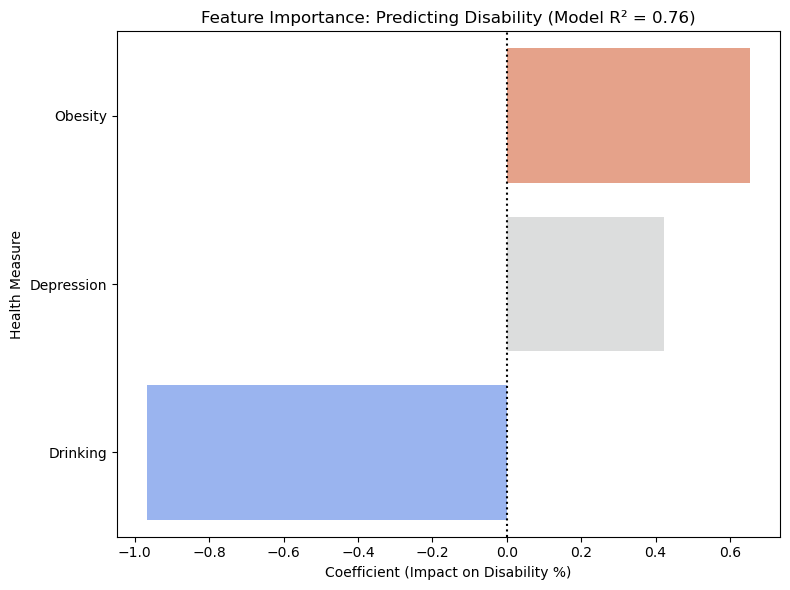

Model Coefficients
                                             Coefficient
obesity among adults aged >=18 years            0.653469
depression among adults aged >=18 years         0.423402
binge drinking among adults aged >=18 years    -0.967563


In [12]:
from sklearn.dummy import DummyRegressor

#defining features and target
#we want to predict disability based on the other three measures.
#target (Y)
target = "any disability among adults aged >=18 years"
#features (X)
features = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years"
]

# Build clean dataset without missing values
X = dfWide[features]
y = dfWide[target]

# Drop rows with NaN in target
target_mask = y.notna()
X = X.loc[target_mask]
y = y.loc[target_mask]

# Drop rows with any NaN in features
feature_mask = ~X.isna().any(axis=1)
X = X.loc[feature_mask]
y = y.loc[feature_mask]

#splitting data into training ant testing sets (80% is training, 20% is testing)
#doing this tests the model on data it has never seen before.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#This model serves as a baseline. It just predicts average disability rate every time. 
#a valuable model should beat it.
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)
r2_baseline = r2_score(y_test, y_pred_dummy)

#this is a supervised ML model using Linear Regression
#it'll learn relationship between the features and the target.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_model = model.predict(X_test)
r2_model = r2_score(y_test, y_pred_model)

#printing interpretation to console
print(f"Model Performance (R-squared)")
print(f"Baseline R² (Mean guessing): {r2_baseline:.3f}")
print(f"Linear Regression R² (testing set): {r2_model:.3f}")
print("\n")

#Creating coefficient dataframe for visualizing
#this holds the results of the model, showing the impact of each feature.
coeffs = pd.DataFrame(model.coef_, index=features, columns=["Coefficient"])
coeffs_plot = coeffs.reset_index().rename(columns={"index": "Health Measure"})

#Creating the figure
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=coeffs_plot, y="Health Measure", x="Coefficient",hue="Health Measure", palette="coolwarm_r", legend=False)          
ax.set(title = f'Feature Importance: Predicting Disability (Model R² = {r2_model:.2f})',
       xlabel='Coefficient (Impact on Disability %)')

#renaming existing ticks
newLabels = ["Obesity", "Depression", "Drinking"]
ax.set_yticks(range(len(newLabels)))
ax.set_yticklabels(newLabels)

#adding vertical line at 0 for a clear baseline reference
ax.axvline(x=0, color='black', linestyle=':')

#tightening and showing the figure
plt.tight_layout()
plt.show()

#printing the raw results for accurate reference from data on plot
print("Model Coefficients")
print(coeffs)

### Support Vector Machine (Ryyan Hussain)

We use Support Vector Regression (SVR, RBF kernel) to predict the prevalence of "diagnosed diabetes among adults aged >=18 years" from non-overlapping health behavior/risk factors:

- Obesity
- No leisure-time physical activity
- High blood pressure
- Current smoking
- Mental health not good for >=14 days

We standardize features, train/test split, report R²/MAE/RMSE, and show a Predicted vs Actual plot with the identity line.

SVR (RBF) Performance
Train  -> R2: 0.932, RMSE: 0.741, MAE: 0.509
Test   -> R2: 0.927, RMSE: 0.749, MAE: 0.522


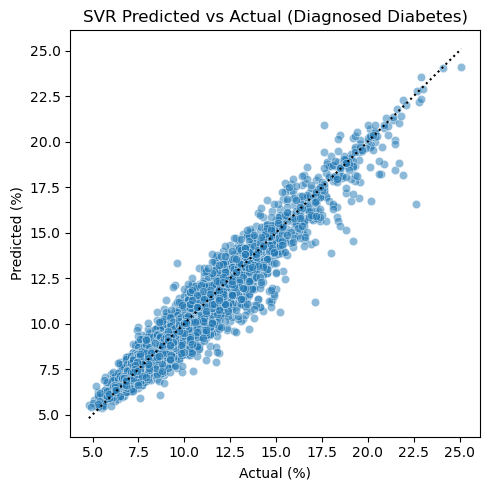

In [13]:
# SVR to predict diagnosed diabetes from related measures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

# Define target and features (exact column names in dfWide)
target = "diagnosed diabetes among adults aged >=18 years"
features = [
    "obesity among adults aged >=18 years",
    "no leisure-time physical activity among adults aged >=18 years",
    "high blood pressure among adults aged >=18 years",
    "current smoking among adults aged >=18 years",
    "mental health not good for >=14 days among adults aged >=18 years",
]

# Validate availability of columns
required = [target] + features
missing = [c for c in required if c not in dfWide.columns]
if missing:
    raise KeyError(f"Missing columns in dfWide needed for SVR: {missing}\n"
                   f"Ensure your filtered CSV includes these measures and re-run the earlier processing cell.")

X = dfWide[features]
y = dfWide[target]

# Drop rows where target is NaN (SVR requires numeric y)
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

# Optional: quick NaN report for features before imputation
nan_report = X.isna().sum().sort_values(ascending=False)
if (nan_report > 0).any():
    print("NaN counts in features before imputation:\n", nan_report[nan_report > 0])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: impute -> standardize -> SVR with RBF kernel
svr_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=10.0, epsilon=0.1, gamma="scale"))
])

svr_pipe.fit(X_train, y_train)

# Evaluate
pred_train = svr_pipe.predict(X_train)
pred_test = svr_pipe.predict(X_test)

r2_tr = r2_score(y_train, pred_train)
r2_te = r2_score(y_test, pred_test)

# Use legacy-compatible RMSE computation
rmse_tr = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_te = np.sqrt(mean_squared_error(y_test, pred_test))
mae_tr = mean_absolute_error(y_train, pred_train)
mae_te = mean_absolute_error(y_test, pred_test)

print("SVR (RBF) Performance")
print(f"Train  -> R2: {r2_tr:.3f}, RMSE: {rmse_tr:.3f}, MAE: {mae_tr:.3f}")
print(f"Test   -> R2: {r2_te:.3f}, RMSE: {rmse_te:.3f}, MAE: {mae_te:.3f}")

# Predicted vs Actual plot
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x=y_test, y=pred_test, alpha=0.5)
lims = [min(y_test.min(), pred_test.min()), max(y_test.max(), pred_test.max())]
plt.plot(lims, lims, linestyle=":", color="black")
ax.set(title="SVR Predicted vs Actual (Diagnosed Diabetes)", xlabel="Actual (%)", ylabel="Predicted (%)")
plt.tight_layout()
plt.show()

## Reflection

Throughout this project, we worked with the CDC PLACES dataset to examine patterns in public health outcomes across the US. The process of cleaning, filtering, and restructuring the data established a strong foundation for subsequent exploration and analysis.  Using data visualizations, we identified clear regional trends, including a strong correlation between obesity and disability, as well as an inverse relationship between binge drinking and other negative health outcomes. These observations informed our preliminary machine learning models, which used predictive analysis to investigate our hypotheses and gather evidence. Integrating visualization with predictive analysis allowed us to validate patterns identified during the data exploration phase and gain a deeper understanding of the relationships among key health indicators nationwide.


## Next Steps

Our upcoming steps for the project will integrate all collected data together and prepare for the final report and presentation . We will hold team discussions to review the research that we have collected, evaluate the results, and analyze their implications in regard to our initial hypotheses made during our initial exploratory data analysis. These insights will be combined into a presentation that outlines our learning processes, early approaches, and the effectiveness of them. 

The presentation will be a deep analysis of our workflow, emphasizing our processes for data collection, filtering, and overall decision-making. We will walk through each stage of the project and examine how we came to our conclusions, including an assessment of failed approaches, unexpected challenges, and what we learned from them. The presentation will also include the visualizations we made along with our interpretation of them and an evaluation of how they fit with our initial hypotheses. We will conclude by discussing the takeaways from our results and its significance to contemporary American healthcare along with how data science can be applied to address complex issues in healthcare and support data driven thinking and decisions

